## Question 1: Use yfinance to Extract Stock Data

In [1]:
!pip install yfinance --quiet

In [2]:
import yfinance as yf
import pandas as pd

In [5]:
# Using ticker Function to Download Tesla stock data
tesla = yf.Ticker("TSLA")

In [6]:
# Using Ticker Object & Function to extract historical market data
tesla_data = tesla.history(period="max")

In [7]:
# Reset the index
tesla_data.reset_index(inplace=True)

In [8]:
# Display the first 5 rows
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Web Scraping to Extract Tesla Revenue Data

In [10]:
import pandas as pd
import requests

In [11]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
response = requests.get(url, headers=headers)
html = response.text

In [12]:
import io
tables = pd.read_html(io.StringIO(html))

for i, table in enumerate(tables):
    print(f"\n--- Table {i} ---")
    print(table.head())


--- Table 0 ---
   Tesla Annual Revenue (Millions of US $)  \
0                                     2024   
1                                     2023   
2                                     2022   
3                                     2021   
4                                     2020   

  Tesla Annual Revenue (Millions of US $).1  
0                                   $97,690  
1                                   $96,773  
2                                   $81,462  
3                                   $53,823  
4                                   $31,536  

--- Table 1 ---
  Tesla Quarterly Revenue (Millions of US $)  \
0                                 2025-03-31   
1                                 2024-12-31   
2                                 2024-09-30   
3                                 2024-06-30   
4                                 2024-03-31   

  Tesla Quarterly Revenue (Millions of US $).1  
0                                      $19,335  
1                         

In [13]:
tesla_revenue_df = tables[1] 

tesla_revenue_df.columns = ["Date", "Revenue"]
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].replace(
    {r"\$": "", ",": ""}, regex=True
)
tesla_revenue_df = tesla_revenue_df[tesla_revenue_df["Revenue"] != ""]
tesla_revenue_df["Revenue"] = tesla_revenue_df["Revenue"].astype(float)


In [14]:
print("\n✅ Cleaned Tesla Revenue Data:")
print(tesla_revenue_df.head())



✅ Cleaned Tesla Revenue Data:
         Date  Revenue
0  2025-03-31  19335.0
1  2024-12-31  25707.0
2  2024-09-30  25182.0
3  2024-06-30  25500.0
4  2024-03-31  21301.0


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [15]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [16]:
import pandas as pd
import requests
import io

In [17]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}
response = requests.get(url, headers=headers)
html = response.text

In [18]:
tables = pd.read_html(io.StringIO(html))

for i, table in enumerate(tables):
    print(f"\n--- Table {i} ---")
    print(table.head())


--- Table 0 ---
   GameStop Annual Revenue (Millions of US $)  \
0                                        2025   
1                                        2024   
2                                        2023   
3                                        2022   
4                                        2021   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $3,823  
1                                       $5,273  
2                                       $5,927  
3                                       $6,011  
4                                       $5,090  

--- Table 1 ---
  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2025-01-31   
1                                    2024-10-31   
2                                    2024-07-31   
3                                    2024-04-30   
4                                    2024-01-31   

  GameStop Quarterly Revenue (Millions of US $).1  
0                 

In [19]:
gme_revenue_df = tables[1]

gme_revenue_df.columns = ["Date", "Revenue"]
gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].replace(
    {r"\$": "", ",": ""}, regex=True
)

gme_revenue_df = gme_revenue_df[gme_revenue_df["Revenue"] != ""]
gme_revenue_df["Revenue"] = gme_revenue_df["Revenue"].astype(float)

In [20]:
print("\n✅ Cleaned GameStop Revenue Data:")
print(gme_revenue_df.head())


✅ Cleaned GameStop Revenue Data:
         Date  Revenue
0  2025-01-31   1283.0
1  2024-10-31    860.0
2  2024-07-31    798.0
3  2024-04-30    882.0
4  2024-01-31   1794.0


## Question 5 - Tesla Stock and Revenue Dashboard

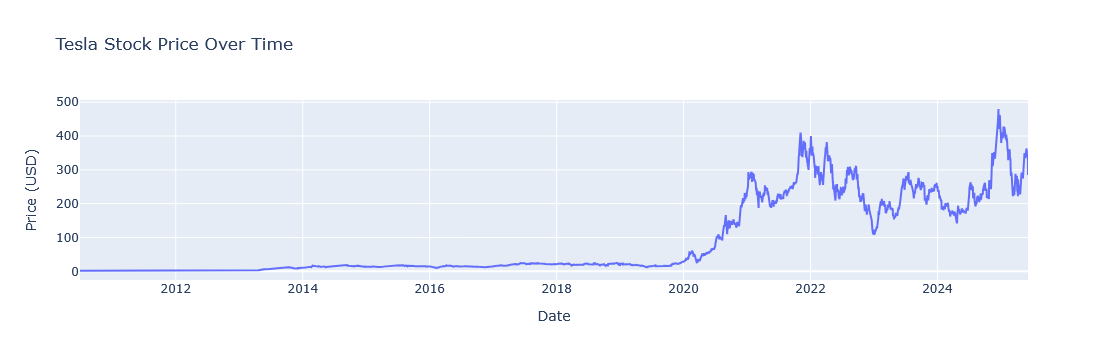

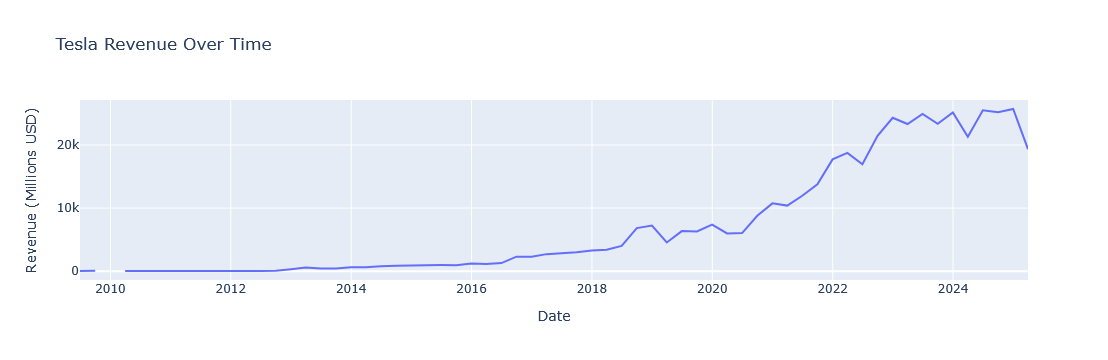

In [21]:
import plotly.graph_objs as go

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=tesla_data['Date'], y=tesla_data['Close'], name="Stock Price"))
fig1.update_layout(title="Tesla Stock Price Over Time", xaxis_title="Date", yaxis_title="Price (USD)")

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=tesla_revenue_df['Date'], y=tesla_revenue_df['Revenue'], name="Revenue"))
fig2.update_layout(title="Tesla Revenue Over Time", xaxis_title="Date", yaxis_title="Revenue (Millions USD)")

fig1.show()
fig2.show()

## Question 6 - GameStop Stock and Revenue Dashboard

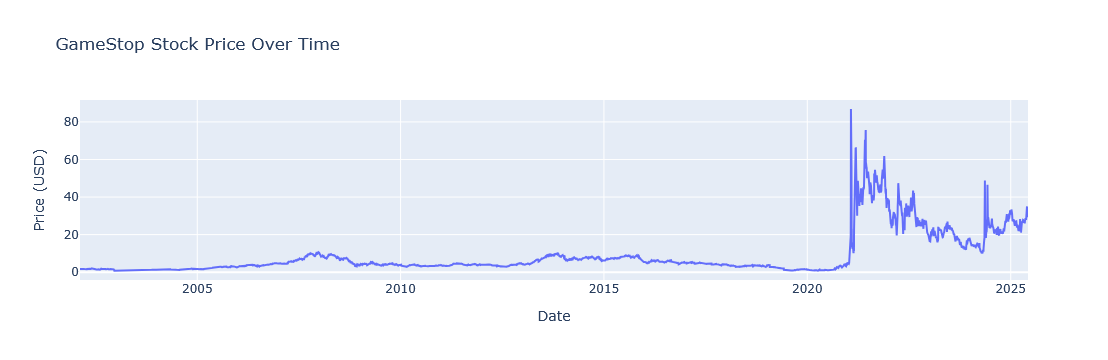

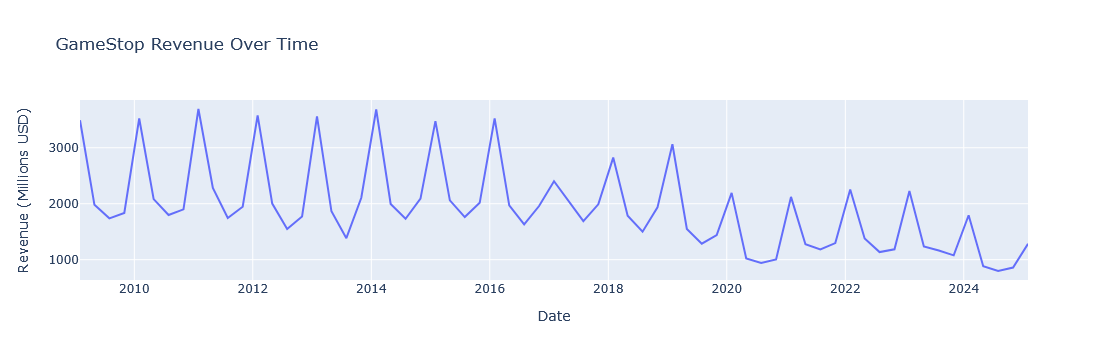

In [22]:
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=gme_data['Date'], y=gme_data['Close'], name="Stock Price"))
fig3.update_layout(title="GameStop Stock Price Over Time", xaxis_title="Date", yaxis_title="Price (USD)")

fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=gme_revenue_df['Date'], y=gme_revenue_df['Revenue'], name="Revenue"))
fig4.update_layout(title="GameStop Revenue Over Time", xaxis_title="Date", yaxis_title="Revenue (Millions USD)")

fig3.show()
fig4.show()
